<a href="https://colab.research.google.com/github/Madhavi-sai/Basic-ML/blob/main/customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer personality analysis**
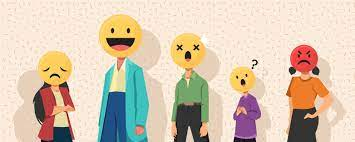   
**Why this data set?**       
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Getting started...  
Importing necessary libraries.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [71]:
cdata = pd.read_csv('/content/drive/MyDrive/marketing_campaign (1).csv',delimiter="\t")
cdata.shape

(2240, 29)

We have 2240 records of customers with 29 columns


In [72]:
cdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Small description of the coumn content**

**People**  
ID: Customer's unique identifier  
Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if customer complained in the last 2 years, 0 otherwise  
**Products**  
MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  
**Promotion**  
NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  
**Place**  
NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s web site in the last month  


**Filtering out the irrelavant columns that do not contribute to the analysis**

In [73]:
cdata.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

From the above,
we dont have the income status of 24 customers, rest of the cells are all filled with appropriate data. And ther is no duplication of data.

In [74]:
cdata = cdata.drop('ID', axis=1) # dropping the columns that do not play any role in statistical analysis
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

int64, float64 and object are the data types of our features. We see that  3 features are of type object, and 24 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 2240 observations, the same number of rows we saw before with shape but 24 observations in income are missing

In [75]:
sum_column = cdata["MntWines"] + cdata["MntFruits"]+cdata["MntMeatProducts"]+cdata["MntFishProducts"]+cdata["MntGoldProds"]+cdata["MntSweetProducts"]
cdata["products"] = sum_column #aading a column products which includes the whole amount spent by the customer.

#**Statistical analysis of the data**

In [76]:
cdata.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,products
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000


 **describe()** is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the cell above.

**Bar plot**

Text(0, 0.5, 'cost of products')

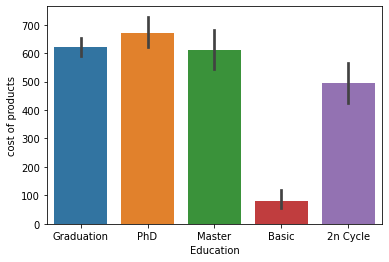

In [77]:
sns.barplot(x = cdata["Education"],y = cdata["products"])
plt.ylabel("cost of products")


Most of the customers of the company hold a graduation degree.

In [78]:
a = sum(cdata["NumDealsPurchases"])       # To analyse the most frequent type of purchase
b = sum(cdata["NumWebPurchases"])
c = sum(cdata["NumCatalogPurchases"])
d = sum(cdata["NumWebVisitsMonth"])
print("NumDealsPurchases=", a,"NumWebPurchases=",b,"NumCatalogPurchases=",c,"NumWebVisitsMonth",d)

NumDealsPurchases= 5208 NumWebPurchases= 9150 NumCatalogPurchases= 5963 NumWebVisitsMonth 11909


**Scatter plot**

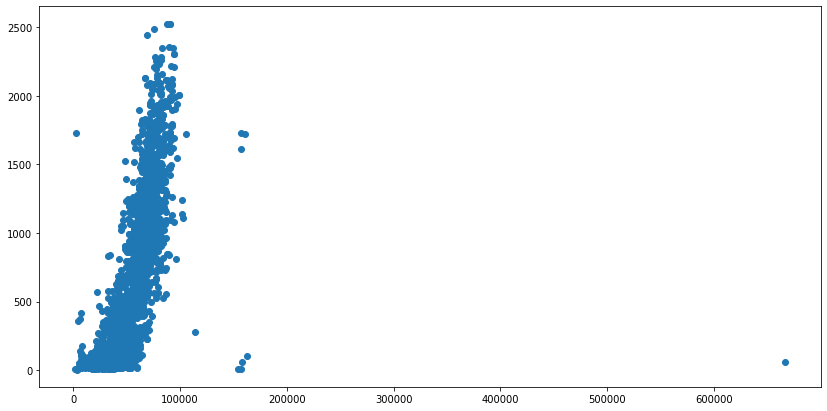

In [79]:
plt.figure(figsize=(14,7))
plt.scatter(cdata["Income"],cdata["products"],linewidths=1,)


The scatterplot above suggests that the income and the amount they spend on poducts are positively correlated, where customers with higher salary typically also tend to buy more products.

To double-check the strength of this relationship, we add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

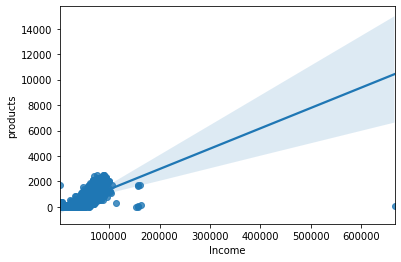

In [80]:
sns.regplot(x=cdata['Income'], y=cdata['products'])

#**Heat Map**
The relevant code to create the heatmap is as follows:

Text(0.5, 1.0, 'Average money people tend to spend on each category of items')

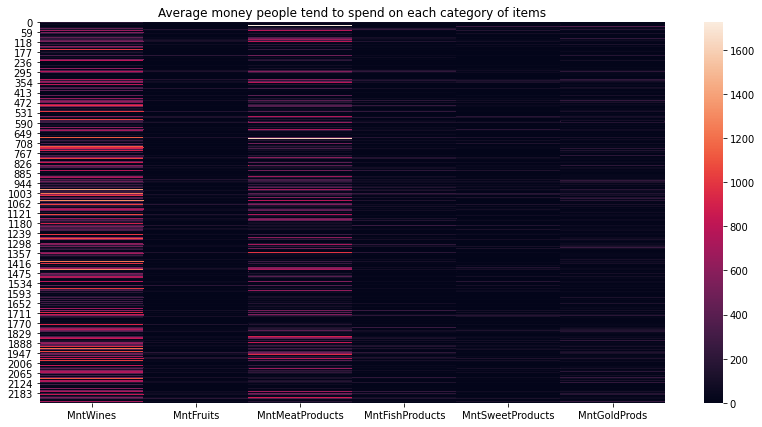

In [81]:
plt.figure(figsize=(14,7))

sns.heatmap(data=cdata.loc[0:, ['MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds']])
plt.title("Average money people tend to spend on each category of items")


**What patterns can we detect from the table?**  
For instance, if we look closely, the MntWines and MntMeatProducts appear relatively light for all customers. This suggests that most of the customers buy meat and wine products. 
So the company can further improve these product qualities and provide discount on other products to increase their value as well.

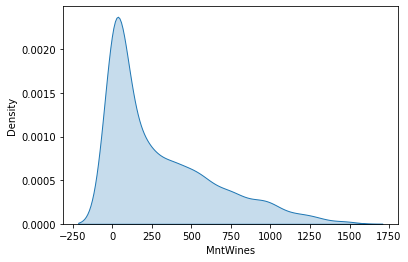

In [82]:
sns.kdeplot(data=cdata['MntWines'], shade=True)


**Observation** of the above cell:  
The sharp kink in the graph shows that most of the customers spend 0-250 units of money on wine. Only a few of them spend more than 1250/- on wines.


#**Conclusion**
So according to the output and overall analysis conducted on this data science project on customer personality analysis with Python, we can conclude that the biggest customers are:

Customers with an average income of around 69,500.  
Customers with an average total spend of approximately $1,252. 
Customers with a graduate degree.  
And customers who are also heavy consumers of meat products and wine products.  
 

 This analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
